In [2]:
import requests
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Leemos el data pkl y realizamos el mismo trabajo de limpieza que en el codigo original.

In [3]:
df = pd.read_pickle("./path/data.pkl")
dff= df.replace({'AGN': 0, 'SN': 1, 'VS':2, 'asteroid':3, 'bogus':4})
Y= dff['class'].values.tolist()
Y2 = np.array(Y)
Y3= Y2.reshape(-1,1)

print(len(Y))
X = np.zeros((len(Y), 3, 21, 21))

i = 0
while i <= len(Y) - 1:
    j = 20
    while j <= 40:
        k = 20
        while k <= 40:
            X[i][0][j - 20][k - 20] = df['cutoutScience'].iloc[i][j][k]
            X[i][1][j - 20][k - 20] = df['cutoutTemplate'].iloc[i][j][k]
            X[i][2][j - 20][k - 20] = df['cutoutDifference'].iloc[i][j][k]
            k = k + 1
        j = j + 1
    i = i + 1

X2 = np.zeros((len(Y), 3))
i = 0
while i <= len(Y) - 1:
    X2[i][0] = np.nanmedian(X[i][0])
    X2[i][1] = np.nanmedian(X[i][1])
    X2[i][2] = np.nanmedian(X[i][2])
    i = i + 1

X3 = np.zeros((len(Y), 3, 21, 21))
z = 0
i = 0
while i <= len(Y) - 1:
    j = 0
    while j <= 20:
        k = 0
        while k <= 20:
            X3[i][0][j][k] = X[i][0][j][k]
            X3[i][1][j][k] = X[i][1][j][k]
            X3[i][2][j][k] = X[i][2][j][k]
            if np.isnan(X3[i][0][j][k]) == True:
                X3[i][0][j][k] = X2[i][0]
                z = z + 1

            if np.isnan(X3[i][1][j][k]) == True:
                X3[i][1][j][k] = X2[i][1]
                z = z + 1

            if np.isnan(X3[i][2][j][k]) == True:
                X3[i][2][j][k] = X2[i][2]

                z = z + 1
            k = k + 1
        j = j + 1
    i = i + 1

X4 = np.zeros((len(Y), 3, 21, 21))
i = 0
while i <= len(Y) - 1:
    X4[i][0] = normalize(X3[i][0])
    X4[i][1] = normalize(X3[i][1])
    X4[i][2] = normalize(X3[i][2])
    i = i + 1

XF = np.zeros((len(Y), 21, 21, 3))
z = 0
i = 0
while i <= len(Y) - 1:
    j = 0
    while j <= 20:
        k = 0
        while k <= 20:
            XF[i][j][k][0] = X4[i][0][j][k]
            XF[i][j][k][1] = X4[i][1][j][k]
            XF[i][j][k][2] = X4[i][2][j][k]
            k = k + 1
        j = j + 1
    i = i + 1


/usr/local/lib/python3.9/dist-packages/pandas/core/array_algos/replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


10


Cargamos el modelo y realizamos la prediccion. 

In [4]:
model = keras.models.load_model('./path/Model')
y_pred = model.predict(XF)
print(y_pred)


1/1 [==============================] - 1s 873ms/step
[[7.82030821e-01 1.92621956e-04 2.16796264e-01 2.39313351e-07
  9.79974167e-04 1.63293423e-09 1.34060762e-08 2.00677808e-09
  1.41543582e-10 3.33111743e-08]
 [2.61164005e-05 2.18300731e-04 2.31348495e-05 8.63646448e-04
  9.98868585e-01 2.81381940e-08 6.36113668e-08 3.70973865e-08
  3.49275431e-09 5.67015697e-08]
 [3.67563576e-01 1.18848798e-03 5.20422101e-01 1.46921388e-06
  1.10823646e-01 2.98796330e-08 8.38716261e-08 2.93551317e-08
  3.02167269e-09 5.31618980e-07]
 [3.34535688e-01 5.67736242e-05 6.64214492e-01 9.99151761e-10
  1.19305344e-03 5.70773203e-12 6.54135565e-11 8.74375138e-12
  1.44606075e-13 7.12116643e-10]
 [9.50663269e-01 5.60514303e-03 3.70276533e-02 1.66309078e-03
  5.03771799e-03 4.24634010e-07 8.92305025e-07 3.44909125e-07
  2.17505303e-07 1.16654542e-06]
 [5.49054239e-03 2.69761349e-05 9.94322181e-01 9.12908429e-11
  1.60268130e-04 2.85344936e-14 1.59514586e-13 6.75721008e-14
  1.47741572e-15 4.75918888e-11]
 [9.0

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


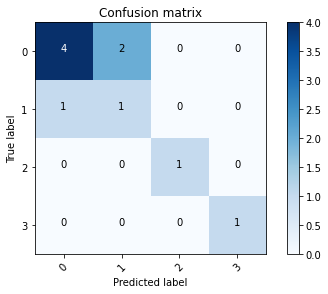

In [6]:
plot_confusion_matrix(confusion_matrix(Y3, np.argmax(y_pred, axis=1)), range(4))